In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('/content/test.csv')
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [12]:
df.isnull().sum()


,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [8]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


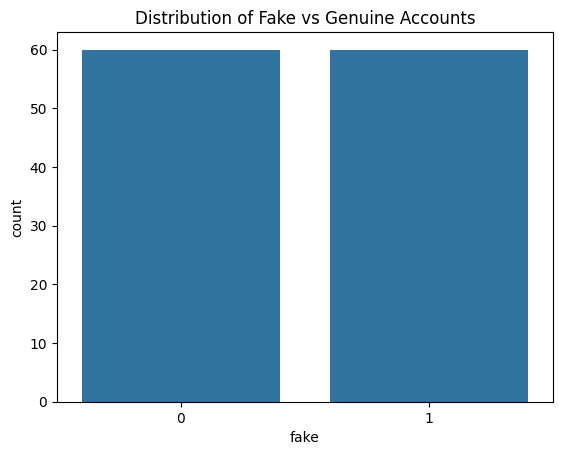

In [10]:
sns.countplot(x='fake', data=df)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()

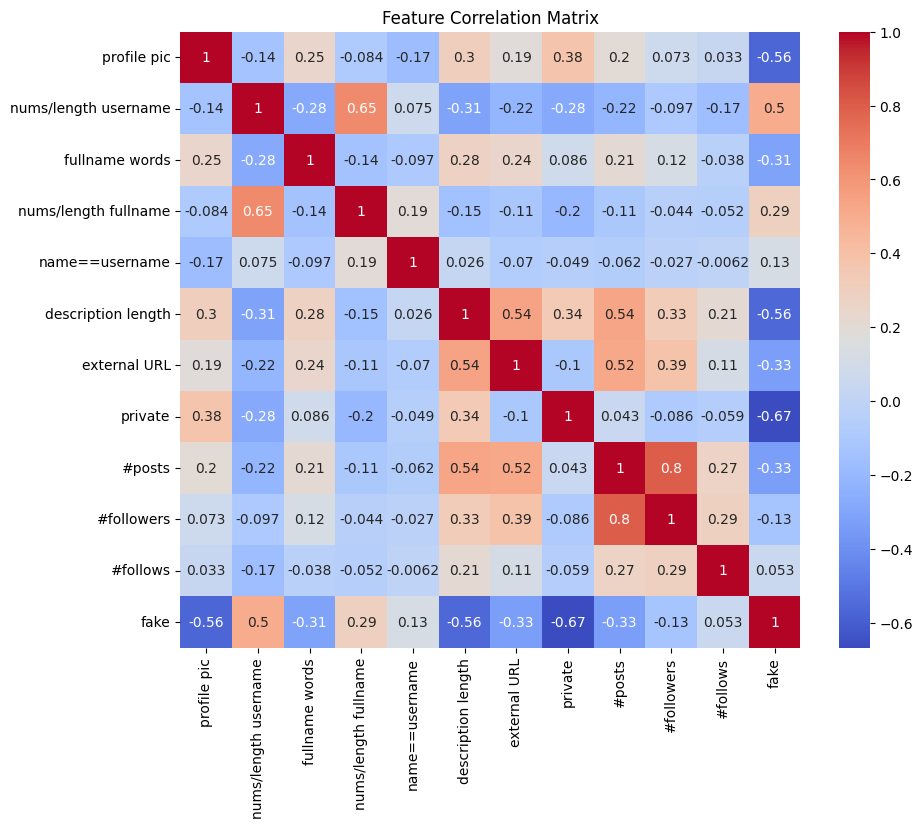

In [13]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

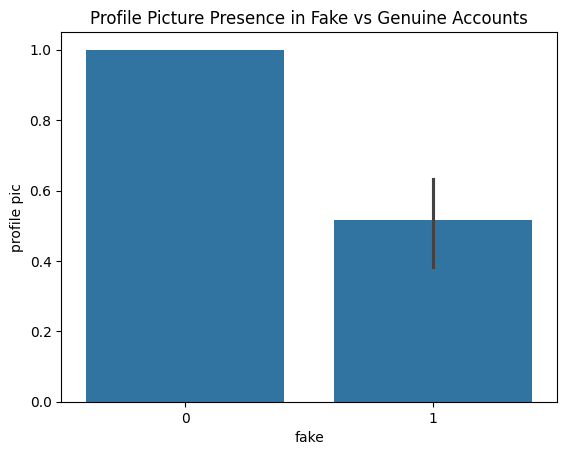

In [15]:
sns.barplot(x='fake', y='profile pic', data=df)
plt.title("Profile Picture Presence in Fake vs Genuine Accounts")
plt.show()

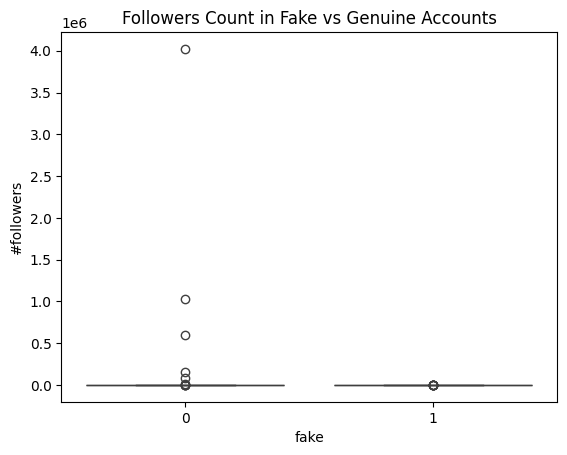

In [17]:
sns.boxplot(x='fake', y='#followers', data=df)
plt.title("Followers Count in Fake vs Genuine Accounts")
plt.show()

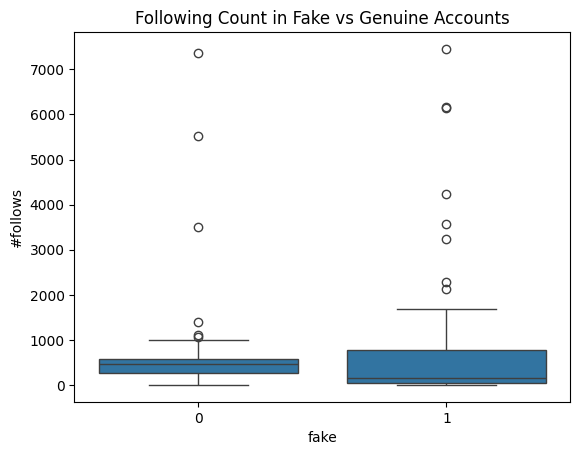

In [18]:
sns.boxplot(x='fake', y='#follows', data=df)
plt.title("Following Count in Fake vs Genuine Accounts")
plt.show()

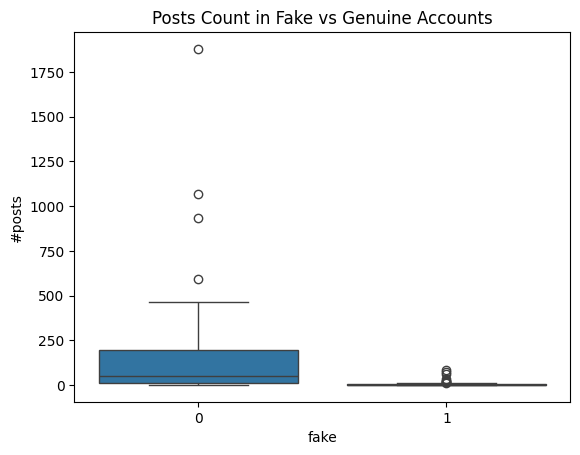

In [19]:
sns.boxplot(x='fake', y='#posts', data=df)
plt.title("Posts Count in Fake vs Genuine Accounts")
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('fake',
axis=1))
scaled_data = pd.DataFrame(scaled_features,
columns=df.columns[:-1])
scaled_data['fake'] = df['fake']

In [22]:
X = scaled_data.drop('fake', axis=1)
y = scaled_data['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [23]:
# Build Random Forest Model
model = RandomForestClassifier(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

/tmp/ipython-input-2834079823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=X.columns[indices], x=importances[indices],


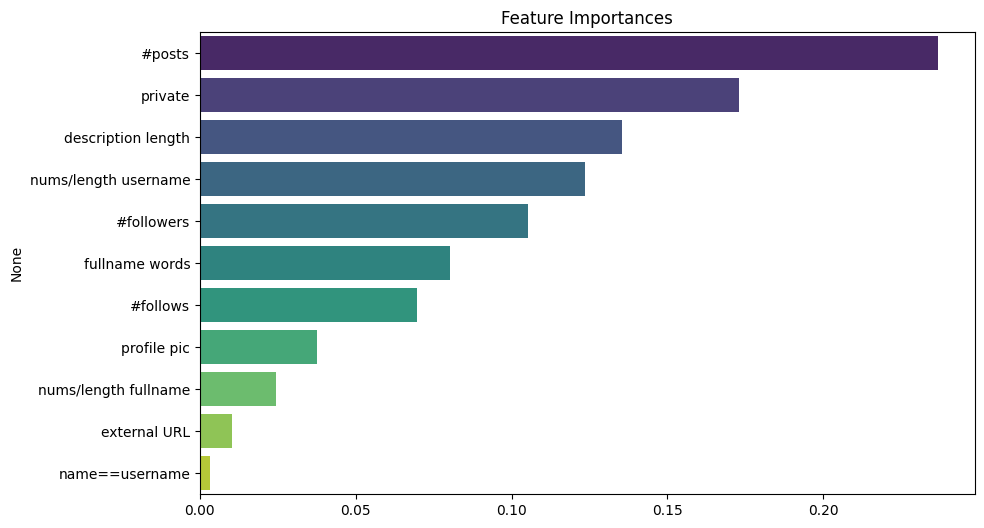

In [24]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(y=X.columns[indices], x=importances[indices],
palette='viridis')
plt.show()

In [25]:
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print("Classification Report:\n", classification_report(y_test,
y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.94      1.00      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
 [[18  1]
 [ 0 17]]


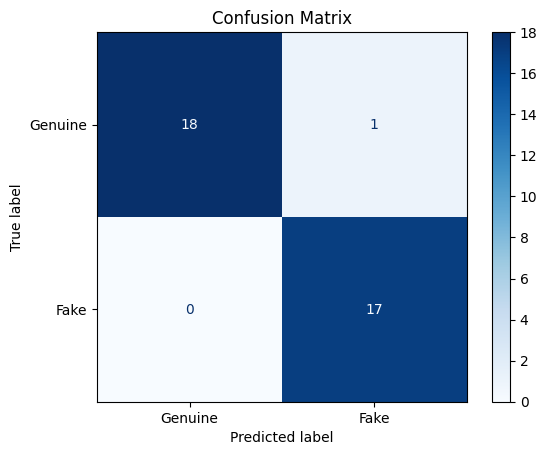

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()